In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 98% 220M/225M [00:03<00:00, 116MB/s] 
100% 225M/225M [00:03<00:00, 71.0MB/s]


In [ ]:
!unzip /content/flowers-recognition.zip

Archive:  /content/flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(300,activation ='relu'))
model.add(Dense(150,activation ='relu'))
model.add(Dense(5,activation ='softmax'))

In [ ]:
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs =10,validation_data = x_test,validation_steps = len(x_test))

<ipython-input-36-ae44ab3bdcb6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs =10,validation_data = x_test,validation_steps = len(x_test))


Epoch 1/10
44/44 [==============================] - 58s 1s/step - loss: 1.5438 - accuracy: 0.4091 - val_loss: 1.2539 - val_accuracy: 0.4899
Epoch 2/10
44/44 [==============================] - 44s 1s/step - loss: 1.1036 - accuracy: 0.5661 - val_loss: 1.0536 - val_accuracy: 0.5893
Epoch 3/10
44/44 [==============================] - 46s 1s/step - loss: 1.0057 - accuracy: 0.6095 - val_loss: 0.9631 - val_accuracy: 0.6333
Epoch 4/10
44/44 [==============================] - 45s 1s/step - loss: 0.9371 - accuracy: 0.6386 - val_loss: 0.8823 - val_accuracy: 0.6641
Epoch 5/10
44/44 [==============================] - 55s 1s/step - loss: 0.8789 - accuracy: 0.6616 - val_loss: 0.8739 - val_accuracy: 0.6562
Epoch 6/10
44/44 [==============================] - 46s 1s/step - loss: 0.8417 - accuracy: 0.6715 - val_loss: 0.8768 - val_accuracy: 0.6650
Epoch 7/10
44/44 [==============================] - 53s 1s/step - loss: 0.8027 - accuracy: 0.6901 - val_loss: 0.7302 - val_accuracy: 0.7223
Epoch 8/10
44/44 [==

In [ ]:
model.save('flowere.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img('/content/flowers/sunflower/12282924083_fb80aa17d4_n.jpg',target_size =(64,64))

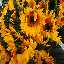

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 180ms/step


'tulip'

In [ ]:
img = image.load_img('/content/flowers/dandelion/1128626197_3f52424215_n.jpg',target_size =(64,64))

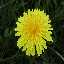

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 50ms/step


'sunflower'

In [ ]:
img = image.load_img('/content/flowers/rose/11944957684_2cc806276e.jpg',target_size =(64,64))

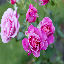

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 31ms/step


'rose'

In [ ]:
img = image.load_img('/content/flowers/sunflower/12282924083_fb80aa17d4_n.jpg',target_size =(64,64))

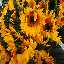

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 30ms/step


'tulip'

In [ ]:
img = image.load_img('/content/flowers/tulip/10128546863_8de70c610d.jpg',target_size =(64,64))

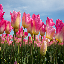

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 28ms/step


'tulip'